In [1]:
import pandas as pd
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import sys
sys.path.append('../../')
from consensus_variables import *

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# File path
file_path = f"{deepcsa_run_dir}/mutatedcellsfromvafam/covered_genomes_cells.genewise.grouped.tsv"

# Load data from the file
mutated_cells_df = pd.read_csv(file_path, sep="\t")
mutated_cells_df["CLEAN_SAMPLE_ID"] = mutated_cells_df["SAMPLE_ID"].map(old2new_sample_names)

In [5]:
mutated_cells_df

,SAMPLE,gene,chr,GENOMES_SNV_AM_TOTAL,GENOMES_SNV_AM_UPPER,GENOMES_SNV_AM_MEAN,GENOMES_SNV_AM_LOWER,GENOMES_INDEL_AM_TOTAL,GENOMES_SNV_ND_TOTAL,GENOMES_SNV_ND_UPPER,GENOMES_SNV_ND_MEAN,GENOMES_SNV_ND_LOWER,SAMPLE_ID,SEX,CELLS_DOUBLE_HIT_SNV_AM_LOWER,CELLS_SINGLE_HIT_SNV_AM_LOWER,CELLS_DOUBLE_HIT_SNV_AM_MEAN,CELLS_SINGLE_HIT_SNV_AM_MEAN,CELLS_DOUBLE_HIT_SNV_AM_UPPER,CELLS_SINGLE_HIT_SNV_AM_UPPER,CELLS_DOUBLE_HIT_SNV_AM_TOTAL,CELLS_SINGLE_HIT_SNV_AM_TOTAL,CELLS_DOUBLE_HIT_SNV_ND_LOWER,CELLS_SINGLE_HIT_SNV_ND_LOWER,CELLS_DOUBLE_HIT_SNV_ND_MEAN,CELLS_SINGLE_HIT_SNV_ND_MEAN,CELLS_DOUBLE_HIT_SNV_ND_UPPER,CELLS_SINGLE_HIT_SNV_ND_UPPER,CELLS_DOUBLE_HIT_SNV_ND_TOTAL,CELLS_SINGLE_HIT_SNV_ND_TOTAL,CELLS_DOUBLE_HIT_INDEL_AM_TOTAL,CELLS_SINGLE_HIT_INDEL_AM_TOTAL,CLEAN_SAMPLE_ID
0,P19_0001_BDO_01,ARID1A,chr1,0.000929,0.000768,0.000684,0.000000,0.000878,0.000269,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000684,0.001369,0.000768,0.001535,0.000929,0.001858,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000269,0.000537,0.000878,0.001756,01_DO
1,P19_0001_BDO_01,CDKN1A,chr6,0.000090,0.000000,0.000000,0.000000,0.000335,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000090,0.000180,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000335,0.000669,01_DO
2,P19_0001_BDO_01,CREBBP,chr16,0.000098,0.000000,0.000000,0.000000,0.000267,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000098,0.000196,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000267,0.000534,01_DO
3,P19_0001_BDO_01,EP300,chr22,0.000365,0.000279,0.000097,0.000000,0.000354,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000097,0.000195,0.000279,0.000558,0.000365,0.000731,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000354,0.000708,01_DO
4,P19_0001_BDO_01,FGFR3,chr4,0.000116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P19_0001_BDO_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000116,0.000233,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,01_DO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,P19_0053_BTR_01,PIK3CA,chr3,0.000047,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,P19_0053_BTR_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000047,0.000094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,53_TR
1382,P19_0053_BTR_01,RB1,chr13,0.001359,0.001322,0.001278,0.000000,0.000181,0.001078,0.000684,0.000684,0.000000,P19_0053_BTR_01,M,0.000000,0.000000,0.001278,0.002555,0.001322,0.002644,0.001359,0.002719,0.000000,0.000000,0.000684,0.001368,0.000684,0.001368,0.001078,0.002156,0.000181,0.000363,53_TR
1383,P19_0053_BTR_01,RBM10,chrX,0.004208,0.004052,0.003885,0.003712,0.015934,0.015904,0.015630,0.015490,0.015342,P19_0053_BTR_01,M,0.003712,0.003712,0.003885,0.003885,0.004052,0.004052,0.004208,0.004208,0.015342,0.015342,0.015490,0.015490,0.015630,0.015630,0.015904,0.015904,0.015934,0.015934,53_TR
1384,P19_0053_BTR_01,STAG2,chrX,0.000102,0.000000,0.000000,0.000000,0.000191,0.000000,0.000000,0.000000,0.000000,P19_0053_BTR_01,M,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000102,0.000102,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000191,0.000191,53_TR


In [37]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

def plot_heatmap_legend(labels, colors, figsize=(2, 0.6)):
    # Create colored patches
    handles = [Patch(facecolor=color, edgecolor='black', label=label, linewidth = 0.5) 
               for color, label in zip(colors, labels)]

    # Create figure for legend
    fig, ax = plt.subplots(figsize=figsize)
    ax.axis('off')

    # Horizontal legend
    legend = ax.legend(handles=handles, loc='center', frameon=False,
                       ncol=len(labels), handleheight=1.2,
                       columnspacing=1.5, handlelength=1.5)

    return fig


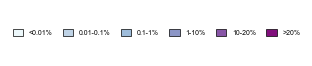

In [38]:
labels = ["<0.01%", "0.01-0.1%", "0.1-1%", "1-10%", "10-20%", ">20%"]
colors = ["#EDF8FB", "#BFD3E6", "#9EBCDA", "#8C96C6", "#8856A7", "#810F7C"]

fig = plot_heatmap_legend(labels, colors)
fig.savefig("plots/ExtendedFig5c_heatmap_legend.pdf", dpi=300, bbox_inches='tight')
plt.show()


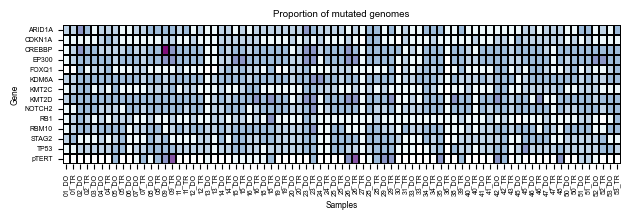

In [8]:
df = mutated_cells_df

# Filter for specific genes
selected_genes = ['TP53', 'TERTpromoter','KDM6A', 'CDKN1A', 'FOXQ1', 'EP300', 'ARID1A', 'KMT2D', 'KMT2C','CREBBP', 'RB1', 'RBM10', 'NOTCH2', 'CDKN1A','STAG2']
df_filtered = df[df["gene"].isin(selected_genes)]
df_filtered.loc[df_filtered["gene"] == 'TERTpromoter','gene'] = 'pTERT'

# Pivot table for heatmap
heatmap_data = df_filtered.pivot(index="gene", columns="CLEAN_SAMPLE_ID", values="CELLS_DOUBLE_HIT_SNV_AM_MEAN")

bins = [-np.inf, 0.0001, 0.001, 0.01, 0.1, 0.2, 1]


#labels = ["<0.001", "0.001-0.01", "0.01-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1"] # 7 groups
labels = ["<0.01%", "0.01-0.1%", "0.1-1%", "1-10%", "10-20%", ">20%"] # 6 groups

# # Define categorical bins and colors
# bins = [-np.inf, 0.001, 0.01, 0.1, 0.2, 0.3, 1]


# #labels = ["<0.001", "0.001-0.01", "0.01-0.1", "0.1-0.2", "0.2-0.3", "0.3-0.4", "0.4-1"] # 7 groups
# labels = ["<0.001", "0.001-0.01", "0.01-0.1", "0.1-0.2", "0.2-0.3", ">0.3"] # 6 groups
#colors = ["#F7FBFF", "#DEEBF7", "#9ECAE1", "#6BAED6", "#3182BD", "#08519C"]  # Blue shades
#colors = ["#F2F0F7", "#DADAEB", "#BCBDDC", "#9E9AC8", "#807DBA", "#6A51A3", "#4A1486"]  # Violate shades
#colors = ["#EDF8FB", "#BFD3E6", "#9EBCDA", "#8C96C6", "#8C6BB1", "#88419D", "#6E016B"]  # two colors violate and blue - 7
colors = ["#EDF8FB", "#BFD3E6", "#9EBCDA", "#8C96C6", "#8856A7", "#810F7C"]  # two colors violate and blue - 6


# Assign categories
heatmap_categorical = pd.cut(heatmap_data.stack(), bins=bins, labels=range(len(labels))).unstack()
# Convert to float (fix TypeError issue)
heatmap_categorical = heatmap_categorical.astype(float)
# Create the heatmap
fig, ax = plt.subplots(figsize=(7.2, 1.8))
cmap = sns.color_palette(colors, as_cmap=True)
sns.heatmap(heatmap_categorical, cmap=cmap, linewidths=0.3, linecolor="black",
            cbar=False, ax=ax, mask=heatmap_categorical.isnull(), annot=False)  # annot=False removes cell values

# Set title and labels
plt.title("Proportion of mutated genomes")
plt.ylabel("Gene")
plt.xlabel("Samples")
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show plot
plt.savefig("plots/ExtendedFig5c_heatmap.pdf", bbox_inches = 'tight', dpi = 300)
plt.show()

In [9]:
heatmap_categorical

CLEAN_SAMPLE_ID,01_DO,01_TR,02_DO,02_TR,03_DO,04_DO,04_TR,05_DO,05_TR,06_DO,07_DO,07_TR,08_DO,08_TR,09_DO,09_TR,11_DO,11_TR,12_DO,12_TR,13_DO,13_TR,14_DO,14_TR,15_DO,15_TR,16_DO,16_TR,18_DO,18_TR,19_DO,19_TR,20_DO,20_TR,23_DO,23_TR,24_DO,24_TR,25_DO,25_TR,26_DO,26_TR,27_TR,28_DO,28_TR,29_DO,29_TR,30_TR,31_TR,33_DO,33_TR,34_DO,34_TR,35_DO,36_TR,38_DO,39_TR,40_DO,40_TR,41_DO,41_TR,42_DO,42_TR,43_TR,45_DO,45_TR,46_DO,46_TR,47_DO,47_TR,48_TR,50_DO,50_TR,51_DO,51_TR,52_DO,52_TR,53_DO,53_TR
gene,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ARID1A,1.0,1.0,3.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,2.0,0.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,2.0
CDKN1A,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,2.0,2.0,0.0,0.0,NaN,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
CREBBP,0.0,1.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,5.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,3.0,3.0,1.0,2.0,2.0,2.0,3.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
EP300,0.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,0.0,0.0,1.0,1.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,3.0,0.0,2.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,NaN,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,2.0,2.0
FOXQ1,NaN,NaN,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,1.0,2.0,1.0,2.0,1.0,1.0,0.0,2.0,NaN,0.0,1.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,NaN,1.0,0.0,1.0,2.0,1.0,2.0,NaN,0.0,2.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,0.0,2.0,2.0,1.0,0.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0
KDM6A,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,1.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0
KMT2C,0.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
KMT2D,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,1.0,2.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,0.0,1.0,3.0,3.0,0.0,2.0,2.0,2.0,3.0,3.0,0.0,2.0,2.0,2.0,3.0,0.0,0.0,1.0,0.0,2.0,2.0,2.0,0.0,3.0,2.0,2.0,0.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,3.0,0.0,0.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0
NOTCH2,0.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,3.0,0.0,1.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,1.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Categories and colors (without NaNs)
n_categories = len(labels)
base_colors = colors

# Add zero category for NaNs
all_categories = ['zero'] + list(range(n_categories))
all_colors = ['#FFFFFF'] + base_colors  # white for NaNs

# Prepare categorical data as before
heatmap_categorical = pd.cut(heatmap_data.stack(), bins=bins, labels=range(n_categories)).unstack()
heatmap_categorical = heatmap_categorical.astype(float)

# Count NaNs as zero category and counts per category per gene
category_counts = pd.DataFrame(0, index=heatmap_categorical.index, columns=all_categories)

for gene in heatmap_categorical.index:
    values = heatmap_categorical.loc[gene]

    # Count NaNs explicitly
    nan_count = values.isna().sum()
    category_counts.at[gene, 'zero'] = nan_count

    # Count occurrences for each bin category
    counts = values.value_counts().reindex(range(n_categories), fill_value=0)
    for cat in range(n_categories):
        category_counts.at[gene, cat] = counts[cat]

# Convert counts to proportions per gene
category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0).fillna(0)


In [11]:
category_proportions

,zero,0,1,2,3,4,5
gene,,,,,,,
ARID1A,0.000000,0.367089,0.392405,0.215190,0.025316,0.000000,0.000000
CDKN1A,0.025316,0.569620,0.354430,0.050633,0.000000,0.000000,0.000000
CREBBP,0.000000,0.126582,0.189873,0.607595,0.063291,0.000000,0.012658
EP300,0.012658,0.113924,0.164557,0.582278,0.126582,0.000000,0.000000
FOXQ1,0.088608,0.430380,0.278481,0.202532,0.000000,0.000000,0.000000
KDM6A,0.000000,0.063291,0.240506,0.670886,0.025316,0.000000,0.000000
KMT2C,0.012658,0.518987,0.316456,0.151899,0.000000,0.000000,0.000000
KMT2D,0.000000,0.151899,0.088608,0.632911,0.126582,0.000000,0.000000
NOTCH2,0.000000,0.139241,0.265823,0.582278,0.012658,0.000000,0.000000


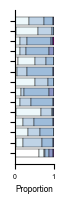

In [36]:
# Plot
fig, ax = plt.subplots(figsize=(0.5, 2))

bottom = pd.Series(np.zeros(len(category_proportions)))
bottom.index = category_proportions.index
y = np.arange(len(category_proportions))[::-1]

for cat in all_categories:
    ax.barh(y, category_proportions[cat],
            left=bottom,
            color=all_colors[all_categories.index(cat)],
            edgecolor='black', linewidth=0.3,
            height = 0.8
            )
    bottom += category_proportions[cat]

# Clean plot
ax.set_yticks(range(len(category_proportions.index)))
# ax.set_yticklabels(category_proportions.index[::-1])
ax.set_yticklabels([])
ax.set_xlim(0, 1)           # Proportion axis from 0 to 1
ax.set_xlabel("Proportion")
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("plots/ExtendedFig5c_stacked.pdf", bbox_inches = 'tight', dpi = 300)
plt.show()
